In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Probabilities
Below is a way to set a decaying curve of probabilities that sum to 100%. This probabilities can be set to whatever.

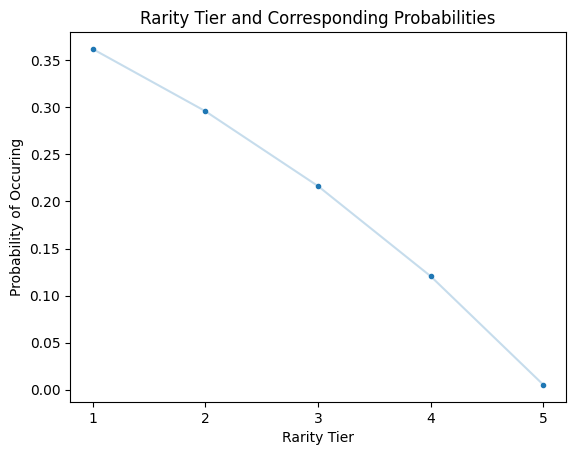

In [2]:
decay = .0075
# as decay approaches 0, function becomes linear
# as decay approaches 100, function becomes constant (equal probabiltiies)
# decay between (.01, .1) is shades of exponential decay

probs = 1 - np.exp(-decay * np.linspace(100, 1, 5))
probs /= probs.sum() # normalize s.t. the sum is 1
tiers = np.arange(1, 6)

plt.title('Rarity Tier and Corresponding Probabilities')
plt.plot(tiers, probs, alpha=.25)
plt.plot(tiers, probs, ls='', marker='.', color='C0')
plt.ylabel('Probability of Occuring')
plt.xticks(ticks=np.arange(1, 6))
plt.xlabel('Rarity Tier');

# To percentages
probs = (probs * 100).round(1)

In [3]:
# These can be adjust manually to whatever,
#   they just have to sum to 100%

print('Tiers         : ', tiers)
print('Probabilities : ', probs)
print('Per 1000      : ', (probs/100 * 1000).astype(int))

Tiers         :  [1 2 3 4 5]
Probabilities :  [36.2 29.6 21.6 12.1  0.5]
Per 1000      :  [362 296 216 121   5]


### Generating Assets
For each asset, e.g. heads, there are N heads per rarity tier. The table below was pulled from the spreadsheet:
```
Tier  N_Heads
----  -------
1     9
2     9
3     16
4     24
5     3
```
For 1000 samples & tier 1 heads, there should be 362 heads that ~evenly consists of the 9 tier 1 head variations. This is 40/41 heads per tier 1 head type (this number would change based on the number of tier 1 heads). At the bottom of the page is the number of heads generate for each of the tier 1 types.

The same procedure can be applied to all body part / asset types.

In [8]:
rules = pd.read_csv('./rulebook.csv')

# total number of generations
n = 1000
n_per_1000 = (probs/100 * n).astype(int)
n_per_1000

for asset_type in rules['Type'].unique():
    
    rows = np.where(rules['Type'] == asset_type)[0]
    asset = rules.iloc[rows]

    for tier, n in zip(tiers, n_per_1000):
       
        weights = asset['Rarity Tier'].astype(int).values
        inds = np.where(weights == tier)[0]

        occurances = {i: 0 for i in range(len(asset))}

        for tier, n in zip(tiers, n_per_1000):
            inds = np.where(weights == tier)[0]
            inds_cyc = cycle(inds)

            for _ in range(n):
                i = next(inds_cyc)
                occurances[i] += 1

    asset['Occurances'] = occurances.values()
    break # stop after just the heads

/tmp/ipykernel_659/3017163373.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset['Occurances'] = occurances.values()


In [11]:
inds = np.where(weights == 1)[0]
asset.iloc[inds]

,Type,Asset,Rarity Tier,Drawn,Group Rules,Individual Rules,Occurances
3,Head,Emerald Headress,1,1.0,NaN,NaN,41
52,Head,Ruby Headress,1,1.0,NaN,NaN,41
53,Head,Sapphire Headress,1,1.0,NaN,NaN,40
54,Head,Topaz Headress,1,1.0,NaN,NaN,40
55,Head,Beanie Goggles,1,1.0,NaN,NaN,40
56,Head,Common One,1,1.0,NaN,NaN,40
57,Head,Common Two,1,1.0,NaN,NaN,40
58,Head,Common Three,1,1.0,NaN,NaN,40
59,Head,Common Four,1,1.0,NaN,NaN,40
